In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Computing Histogram
### Allows you to visualize the distribution of pixel intensities in an image

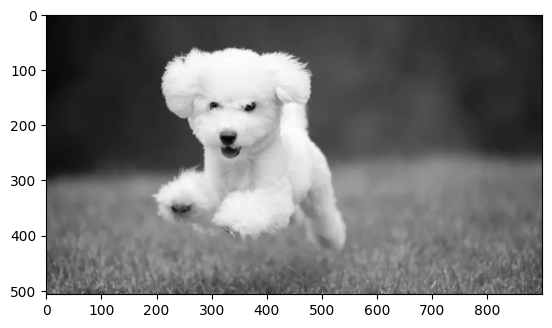

In [24]:
img = cv.imread("dog.jpeg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)


# By default, plt.imshow() applies a colormap to the grayscale image, which can lead to what looks like an inverted color effect.
# The grayscale image values are mapped to a colormap, resulting in a colored image that may not represent the actual grayscale values correctly.
#To properly display a grayscale image, you should specify the colormap explicitly:
plt.imshow(gray,cmap='gray')

## Grayscale histogram

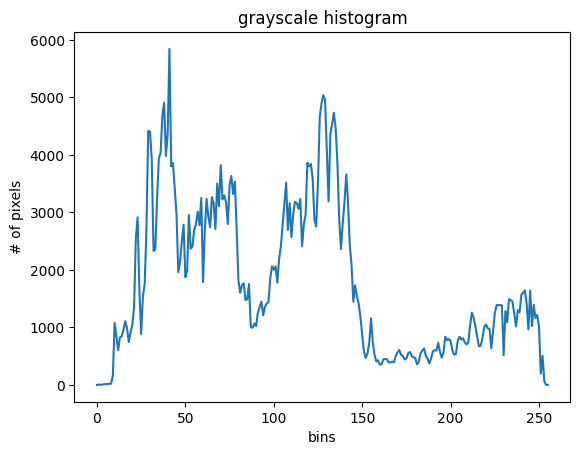

In [14]:
gray_hist = cv.calcHist([gray],[0],None,[256],[0,256])

plt.figure()
plt.title("grayscale histogram")
plt.xlabel("bins")
plt.ylabel("# of pixels")
plt.plot(gray_hist)

### Above graph shows that highest occuring pixel value is around 40 with frequency of 6000.
### Second highest peak lies between 100-150

## Compute Histogram on a mask

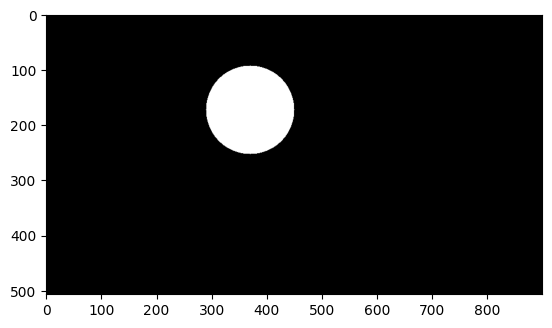

In [34]:
blank = np.zeros(img.shape[:2],dtype='uint8')
circle=cv.circle(blank,(img.shape[1]//2-80,img.shape[0]//2-80),80,255,-1)

plt.imshow(cv.cvtColor(circle, cv.COLOR_BGR2RGB))

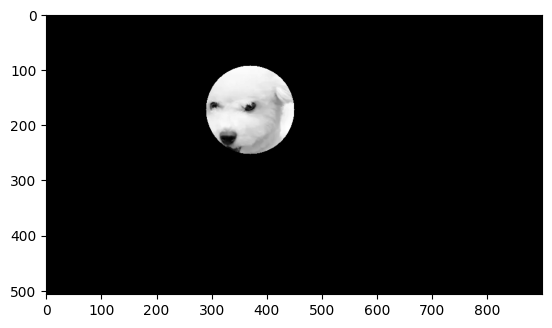

In [35]:
mask = cv.bitwise_and(gray,gray,mask=circle)
plt.imshow(mask,cmap="gray")

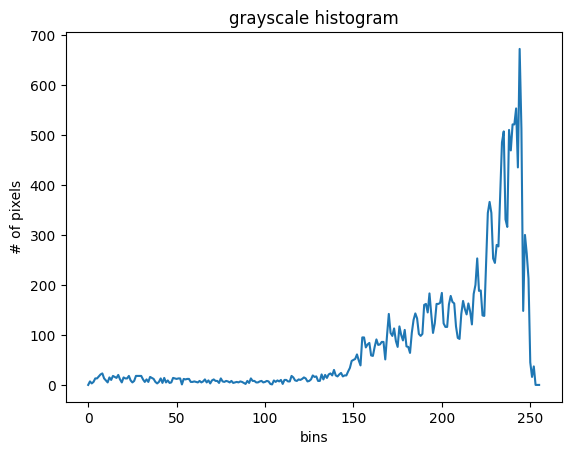

In [36]:
gray_hist = cv.calcHist([gray],[0],mask,[256],[0,256])

plt.figure()
plt.title("grayscale histogram")
plt.xlabel("bins")
plt.ylabel("# of pixels")
plt.plot(gray_hist)

## Compute a color histogram

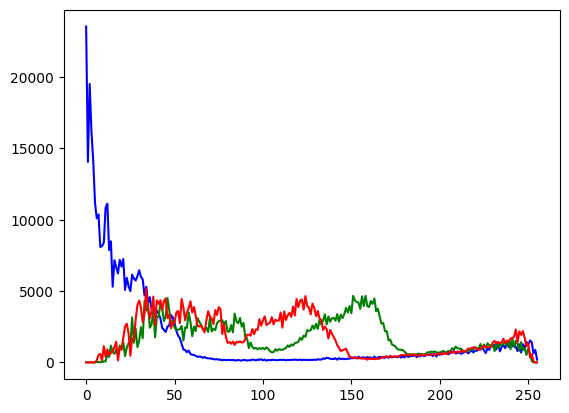

In [37]:
colors = ('b','g','r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=col)

plt.show()

## Compute a color histogram for masked image

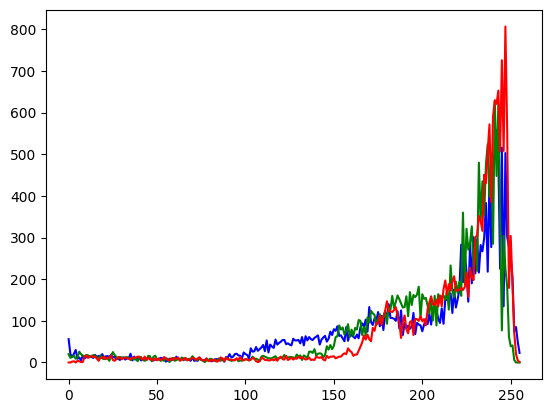

In [47]:
mcolor = cv.bitwise_and(img,img,mask=circle)
colors = ('b','g','r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.plot(hist,color=col)

plt.show()

# Thresholding
### Binarization of an image: Conversion to binary image
### Only 2 values: 0 and 255
### Define thershold ourself

In [48]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

### Simple thresholding

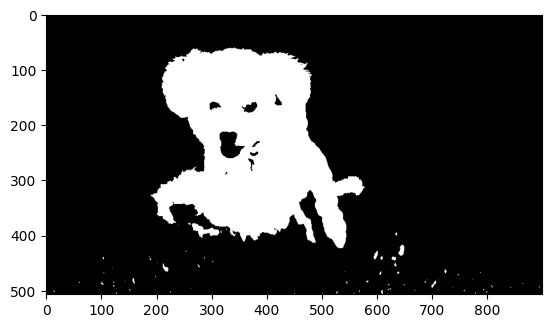

In [52]:
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY) # 150 threshold value, 255 maximun value which will be rounded off to
# threshold = 150
# threh = threholded image

plt.imshow(thresh,cmap="gray")

### Simple Thresholding(Inverse)

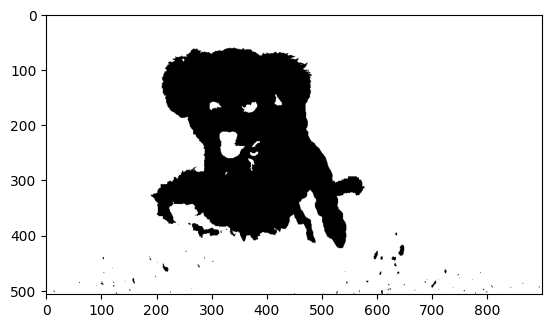

In [53]:
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV) # 150 threshold value, 255 maximun value which will be rounded off to
# threshold = 150
# threh = threholded image

plt.imshow(thresh,cmap="gray")

### Adaptive Thresholding
### Optimal Threshold value found by algorithm

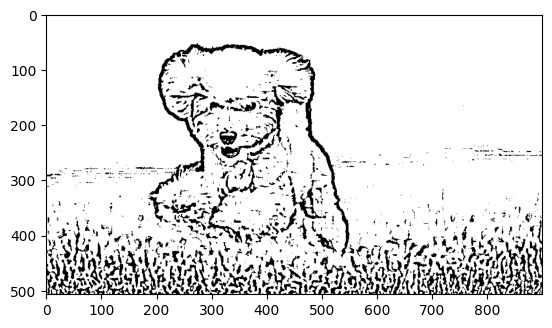

In [56]:
# 255 maximun value which will be rounded off to
# ADAPTIVE_THRESH_MEAN_C = Mean computed and C subtracted
# THRESH_BINARY = 
# 11 = block size/ kernel size used to compute the mean
# 3 = C values / interger that is subtract from mean to fintune

thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,3) 
# threshold = 150
# threh = threholded image

plt.imshow(thresh,cmap="gray")

### Adaptive Thresholding(Inverse)

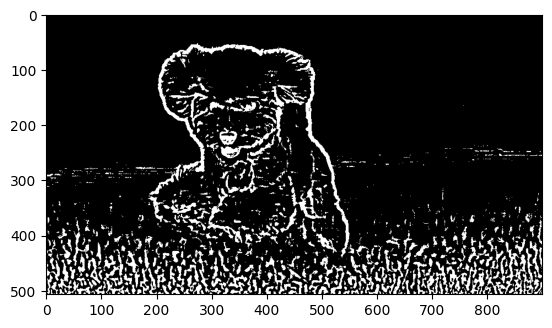

In [57]:
# 255 maximun value which will be rounded off to
# ADAPTIVE_THRESH_MEAN_C = Mean computed and C subtracted
# THRESH_BINARY = 
# 11 = block size/ kernel size used to compute the mean
# 3 = C values / interger that is subtract from mean to fintune

thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,11,3) 
# threshold = 150
# threh = threholded image

plt.imshow(thresh,cmap="gray")

# Edge Detection
### Gradient =/- Edge mathematically
### Canny is one advanced edge detection method/algorithm but there are others aswell

## Laplaction
### Calculates gradients

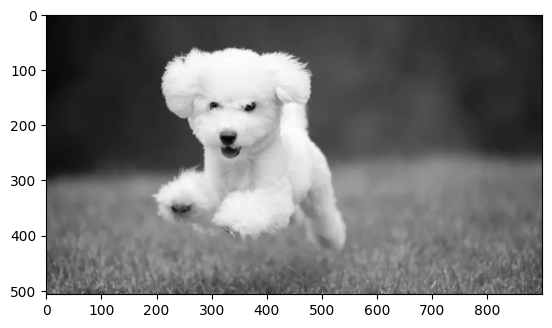

In [60]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

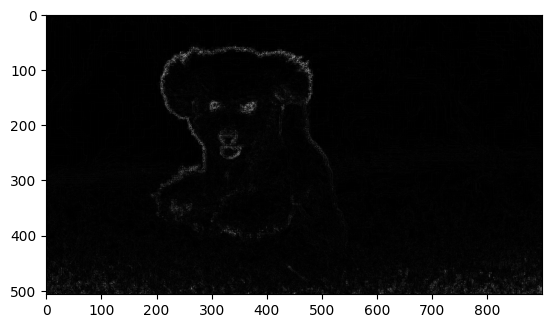

In [66]:
lap = cv.Laplacian(gray,cv.CV_64F) #ddepth/data depth is CV_64F
lap = np.uint8(np.absolute(lap))
plt.imshow(lap,cmap="gray")

## Sabel
### Computes gradients in 2 axis (x and y)

In [67]:
sobelx = cv.Sobel(gray,cv.CV_64F,1,0)
sobely = cv.Sobel(gray,cv.CV_64F,0,1)

###  There may be presence of invalid values (such as NaN or inf) in the Sobel gradient images. This can happen when using floating-point operations, which can produce out-of-range values

### To fix this, you should convert the Sobel gradient images to a proper displayable format. One common approach is to take the absolute value of the gradients and then normalize them to an appropriate range.

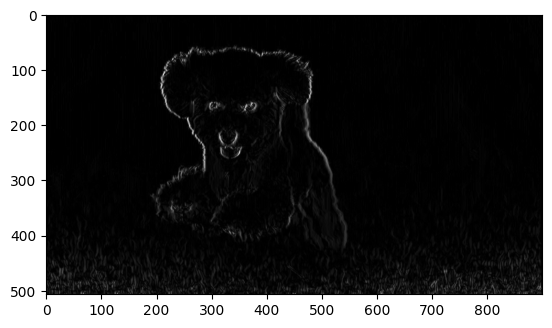

In [84]:
abs_sobelx = np.absolute(sobelx)
plt.imshow(abs_sobelx,cmap="gray")

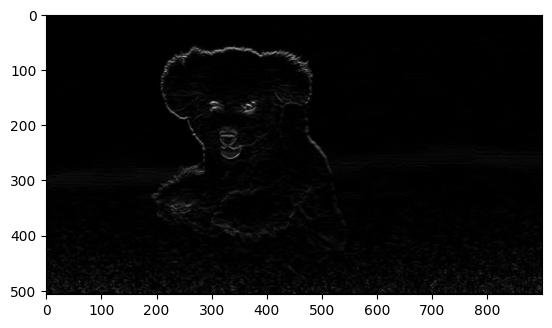

In [85]:
abs_sobely = np.absolute(sobely)
plt.imshow(abs_sobely,cmap="gray")

## Combined sobel image

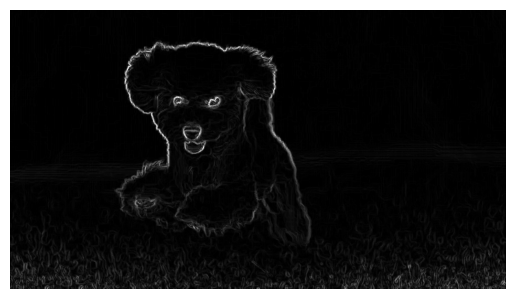

In [86]:
sobelx_8u = np.uint8(255 * abs_sobelx / np.max(abs_sobelx))
sobely_8u = np.uint8(255 * abs_sobely / np.max(abs_sobely))

combined_sobel = cv.bitwise_or(sobelx_8u, sobely_8u)

plt.imshow(combined_sobel, cmap='gray')
plt.axis('off')  # Optional: hides the axis
plt.show()

## Canny

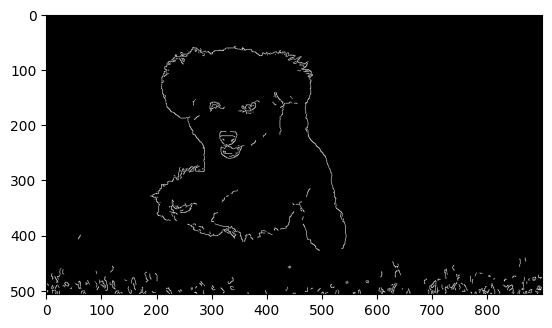

In [88]:
cany = cv.Canny(img,125,175) ### Reduce the amount of edges by applying blur
plt.imshow(cv.cvtColor(cany,cv.COLOR_BGR2RGB))

# Face Detection
### Face Detection = Detecting presense of a face in an image
### Face Recognition = Dectecting whose face it is
### Face detection performed through classifiers. Classifiers  = Algorithm that decides whether an image is positive/negative (face is present or not). OpenCV comes in with pretrained classifiers that we can use in any program.

## Harrcascade classifiers
### Many classifiers present for eye, face, body etc

### First copy .xml file from opencv repo to this directory

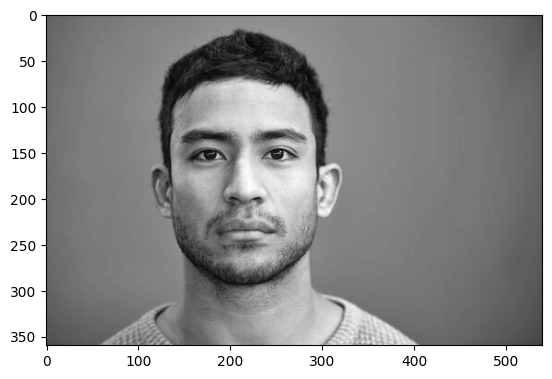

In [37]:
img = cv.imread("face.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

In [38]:
haar_classifier = cv.CascadeClassifier("face.xml")

In [39]:
faces = haar_classifier.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=3)
print(f"number of faces detected: {len(faces)}")
print(f"coordinates for them : {faces}")

number of faces detected: 1
coordinates for them : [[110  68 210 210]]


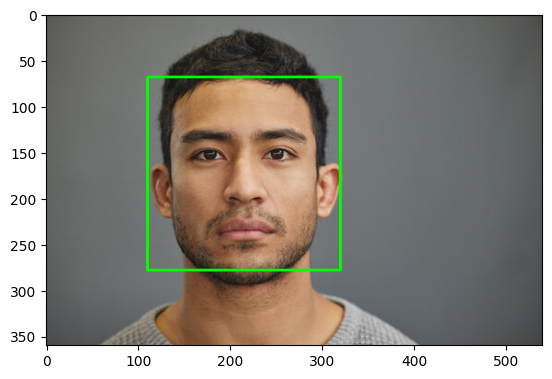

In [40]:
for (x,y,w,h) in faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),thickness=2)

plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

## Face Recognition
### Train opencv's built-in recognizer on sample images

In [4]:
import os

In [5]:
p = os.listdir("Faces/train")
p

['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']

In [28]:
DIR_test = 'c:\\Users\\Hamza\\Desktop\\New folder\\Computer_Vision\\Faces\\val'

In [6]:
def create_train():
    features = []
    labels = []
    DIR = 'c:\\Users\\Hamza\\Desktop\\New folder\\Computer_Vision\\Faces\\train'
    for person in p:
        path = os.path.join(DIR,person)
        label = p.index(person)

        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            img_array = cv.imread(img_path)
            gray = cv.cvtColor(img_array,cv.COLOR_BGR2GRAY)

            haar_classifier = cv.CascadeClassifier("face.xml")
            faces = haar_classifier.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=3)

            for (x,y,w,h) in faces:
                faces_roi = gray[y:y+h,x:x+w]
                features.append(faces_roi)
                labels.append(label)

    return features,labels

f,l = create_train()

In [18]:
print(len(f),len(l))

103 103


In [2]:
face_recognizer = cv.face.LBPHFaceRecognizer_create()

In [7]:
face_recognizer.train(np.array(f,dtype="object"),np.array(l))

In [8]:
face_recognizer.save("face_trained.yml")

### Load and Use this model on testing data

In [10]:
face_recognizer.read("face_trained.yml")

Label -> 0 predicted with conf -> 60.069416291380506


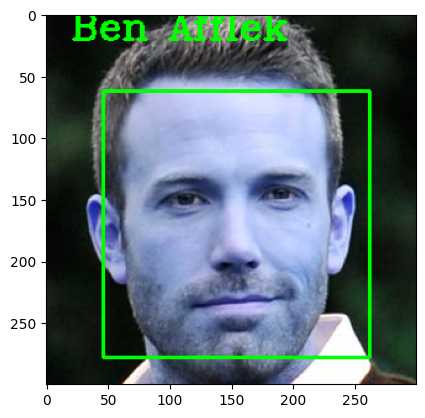

In [42]:
img = cv.imread("2.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

faces = haar_classifier.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=3)

for (x,y,w,h) in faces:
    faces_roi = gray[y:y+h,x:x+h]
    label,conf = face_recognizer.predict(faces_roi)
    print(f"Label -> {label} predicted with conf -> {conf}")

    cv.putText(img,str(p[label]),(20,20),cv.FONT_HERSHEY_COMPLEX,1.0,(0,255,0),thickness=2)
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),thickness=2)

plt.imshow(img)